In [27]:
import pandas as pd
df_movies=pd.read_csv("movies.dat",sep=r'::',engine='python',header=None)
movies_col=['movie_id','movie_name','genere']
df_movies.columns=movies_col
df_movies.head()

,movie_id,movie_name,genere
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [28]:
import pandas as pd
from matplotlib import pyplot as plt
df_users=pd.read_csv("users.dat",sep=r'::',engine='python',header=None)
users_col=['user_id','gender','age','tag','timestamp']
df_users.columns=users_col
df_users.drop(['tag','timestamp'],axis=1,inplace=True)
df_users.head()

,user_id,gender,age
0,1,F,1
1,2,M,56
2,3,M,25
3,4,M,45
4,5,M,25


In [29]:
df_ratings=pd.read_csv("ratings.dat",sep=r'::',engine='python',header=None)
ratings_col=['user_id','movie_id','rating','timestamp']
df_ratings.columns=ratings_col
df_ratings.drop(['timestamp'],axis=1,inplace=True)
df_ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [30]:
%matplotlib inline

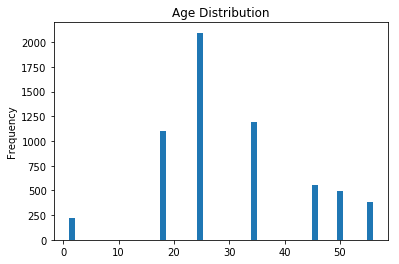

In [31]:
df_users['age'].plot(kind='hist',bins=50,title='Age Distribution')

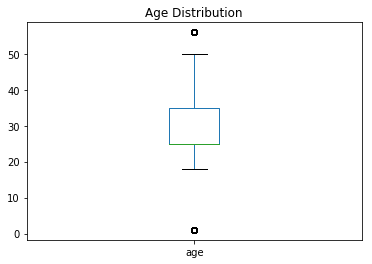

In [32]:
df_users['age'].plot(kind='box',title='Age Distribution')

In [33]:
df_ratings.describe() #rating seesm to be slightly left skewed

,user_id,movie_id,rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


Text(0.5,0,'Ratings')

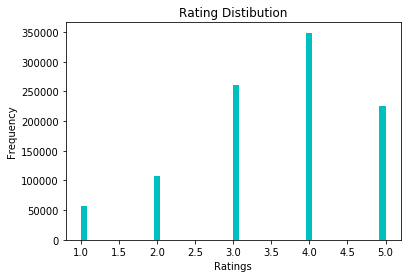

In [34]:
df_ratings['rating'].plot(kind='hist',title='Rating Distibution',bins=50,color='c')
plt.xlabel('Ratings')

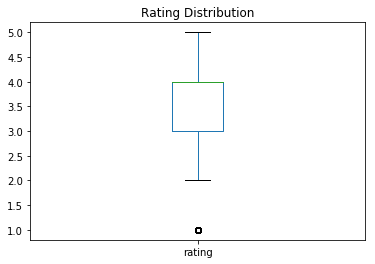

In [35]:
df_ratings['rating'].plot(kind='box',title='Rating Distribution')

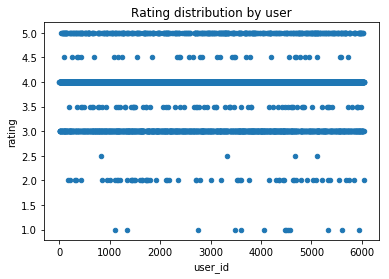

In [36]:
df=df_ratings.groupby('user_id')[['user_id','rating']].agg({'rating':'median'})
df.columns=df.columns.droplevel(level=0)
df.plot(kind='scatter',x='user_id',y='rating',title='Rating distribution by user')


In [37]:
df_toy=df_movies[df_movies['movie_name'].str.contains('Toy Story')]
df_toy_rate=df_toy.join(df_ratings.set_index('movie_id'),how='inner',on='movie_id',rsuffix='_rating',lsuffix='_movie')[['movie_name','rating']]
pd.crosstab(df_toy_rate.movie_name,df_toy_rate.rating)

rating,1,2,3,4,5
movie_name,,,,,
Toy Story (1995),16,61,345,835,820
Toy Story 2 (1999),25,44,214,578,724


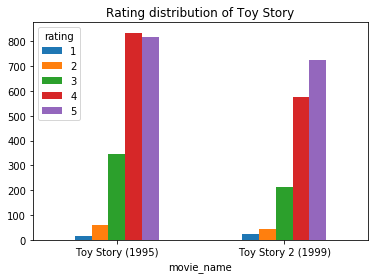

In [38]:
pd.crosstab(df_toy_rate.movie_name,df_toy_rate.rating).plot(kind='bar',rot=0,title='Rating distribution of Toy Story')

In [39]:
df_movie_rating_toy=df_movies[df_movies['movie_name'].str.contains('Toy Story')].join(df_ratings.set_index('movie_id'),how='inner',on='movie_id')
df_toy_viewership=df_movie_rating_toy.join(df_users.set_index('user_id'),how='inner',on='user_id')[['user_id','age','movie_name']]
pd.crosstab(df_toy_viewership.movie_name,df_toy_viewership.age)

age,1,18,25,35,45,50,56
movie_name,,,,,,,
Toy Story (1995),112,448,790,423,143,108,53
Toy Story 2 (1999),99,331,578,342,112,72,51


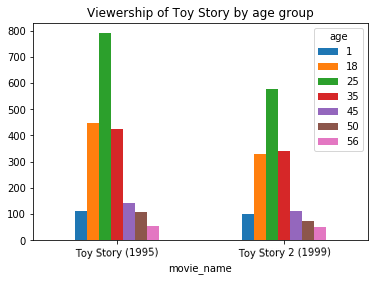

In [40]:
pd.crosstab(df_toy_viewership.movie_name,df_toy_viewership.age).plot(kind='bar',rot=1,title='Viewership of Toy Story by age group')

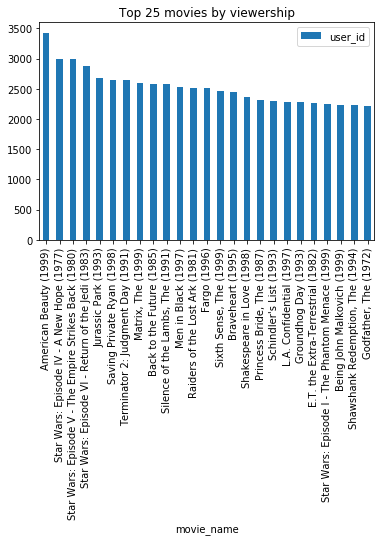

In [41]:
df_movie_rating=df_movies.join(df_ratings.set_index('movie_id'),how='inner',on='movie_id')
df_viewership=df_movie_rating.groupby('movie_name')[['user_id']].agg('count')
#df_viewership.columns=df_viewership.columns.droplevel(level=0)
#df_viewership.columns.values.tolist()
#df_viewership.plot(kind='bar')
df_viewership.sort_values(by='user_id', ascending=False).head(25).plot(kind='bar',title='Top 25 movies by viewership')

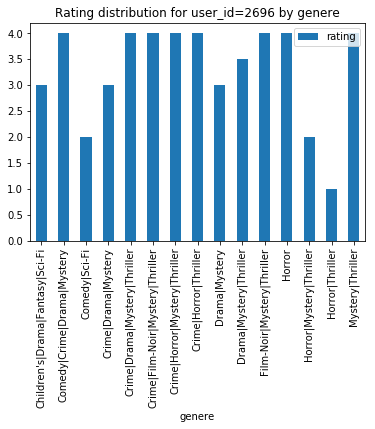

In [42]:
df_2696=df_ratings[df_ratings['user_id']==2696].join(df_movies.set_index('movie_id'),on='movie_id',how='inner')[['movie_name','genere','rating']]
df_2696.sort_values('genere')
df_mean_rate=df_2696.groupby('genere')[['genere','rating']].agg({'rating':'mean'})
df_mean_rate.columns=df_mean_rate.columns.droplevel(level=0)
df_mean_rate.plot(kind='bar',title='Rating distribution for user_id=2696 by genere')

In [43]:
df_top500=df_ratings.join(df_users.set_index('user_id'),how='inner',on='user_id')[['movie_id','age','rating']].head(500)
df_top500.sort_values('age')

,movie_id,age,rating
0,1193,1,5
29,745,1,3
30,2294,1,4
31,3186,1,4
32,1566,1,4
33,588,1,4
34,1907,1,4
35,783,1,4
36,1836,1,5
37,1022,1,5


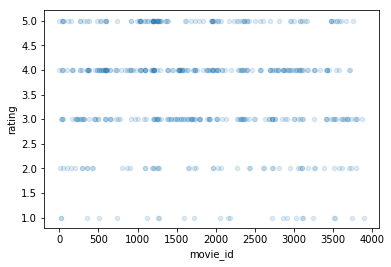

In [44]:
#df_top500.groupby('movie_id')[['movie_id','rating']].agg({'rating':'median'})
#df_mov_rate.columns=df_mov_rate.columns.droplevel(level=0)
#df_mov_rate.plot(kind='scatter',x='movie_id',y='rating',alpha=0.15)
df_top500.plot(kind='scatter',x='movie_id',y='rating',alpha=0.15)

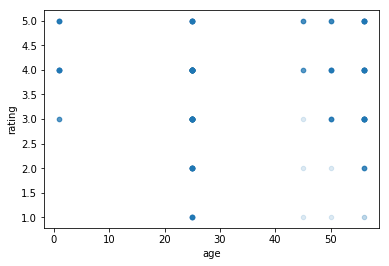

In [45]:
#df_top500.groupby('age')[['age','rating']].agg({'rating':'median'})
df_top500.plot(kind='scatter',x='age',y='rating',alpha=0.15)

In [46]:
from sklearn.linear_model import LinearRegression
feature_cols = ['movie_id','age']
X = df_top500[feature_cols]
y = df_top500.rating
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

3.70132687623
[-0.00010503  0.00229778]


In [48]:
from sklearn.model_selection import train_test_split
feature_cols = ['movie_id','age']
X = df_top500[feature_cols]
y = df_top500.rating

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

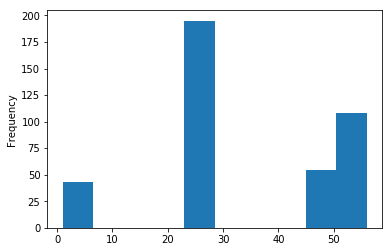

In [51]:
X_train.age.plot(kind='hist')

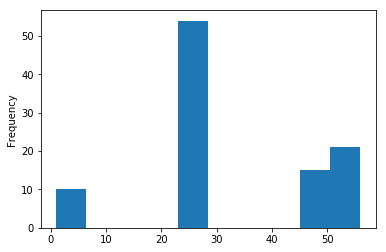

In [52]:
X_test.age.plot(kind='hist')